In [2]:
# impoert libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# load dataset
df = pd.read_csv("users/praneethpannu/downloads/uber Data.csv")

In [4]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [5]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [6]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [7]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [9]:
df.shape

(6745, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Checking data quality issues and cleaning

In [11]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [13]:
#checking for any duplicate rows
df.duplicated(subset='Request_id',keep= False).sum()

np.int64(0)

In [14]:
#checking for any spelling mistake in Pickup point
df['Pickup_point'].unique()

array(['Airport', 'City'], dtype=object)

In [15]:
#checking for any spelling mistake in status
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [16]:
#Inspecting Null values
df.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

#### Data preparation

In [18]:
# Correcting the column names
df.columns = df.columns.str.strip()  # Remove any extra spaces

# Now apply the conversion using correct column names
def parse_datetime(x):
    for fmt in ("%d/%m/%Y %H:%M", "%d-%m-%Y %H:%M:%S"):
        try:
            return pd.to_datetime(x, format=fmt, dayfirst=True)
        except:
            continue
    return pd.NaT

# Apply parsing
df['request_Date_Time'] = df['Request_timestamp'].apply(parse_datetime)
df['drop_Date_Time'] = df['Drop_timestamp'].apply(parse_datetime)

# View cleaned data
df.head(15)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,request_Date_Time,drop_Date_Time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00,2016-07-11 07:25:00


In [19]:
#checking if request_Date_Time and drop_Date_Time got converted to datetime type or not
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   object        
 5   Drop_timestamp     2831 non-null   object        
 6   request_Date_Time  6745 non-null   datetime64[ns]
 7   drop_Date_Time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 421.7+ KB
None


In [26]:
# dropping Request_timestamp column and Drop_timestamp  as it is not required any further
uber = df.drop(['Request_timestamp', 'Drop_timestamp'], axis=1)

# Preview result
uber.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [28]:
uber.shape

(6745, 6)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   object        
 5   Drop_timestamp     2831 non-null   object        
 6   request_Date_Time  6745 non-null   datetime64[ns]
 7   drop_Date_Time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 421.7+ KB


#### Data preparation

#### Handling request_Date_Time

In [31]:
#checking if there are any NA's coerced because of invalid values in request_Date_Time
df['request_Date_Time'].isna().sum()

np.int64(0)

In [32]:
#extracting date and time from request_Date_Time
df['request_Date'] = df['request_Date_Time'].dt.date
df['request_Time'] = df['request_Date_Time'].dt.time
df.head(10)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,request_Date_Time,drop_Date_Time,request_Date,request_Time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00


In [33]:
#extracting day of week from request date time
df['request_DayOfWeek'] = df['request_Date_Time'].dt.weekday
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,0
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,0
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,1
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,1
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2


In [42]:
#extracting hour,min and seconds from Request Date_Time
df['request_hour'] = df['request_Date_Time'].dt.hour
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,0,11
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,0,17
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,1,9
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,1,21
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2,8


In [50]:
# Creating request_timeslot based on request_hour
df['request_hour'].between(0, 3, inclusive = 'both'), 'request_timeslot' == 'Late night'
df['request_hour'].between(4, 6, inclusive = 'both'), 'request_timeslot' == 'Early morning'
df['request_hour'].between(7, 12, inclusive = 'both'), 'request_timeslot' == 'Morning'
df['request_hour'].between(13, 17, inclusive = 'both'), 'request_timeslot' == 'Afternoon'
df['request_hour'].between(18, 20, inclusive = 'both'), 'request_timeslot' == 'Evening'
df['request_hour'].between(21, 23, inclusive = 'both'), 'request_timeslot' == 'Night'
df.head(10)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,request_timeslot
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,0,11,Morning
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,0,17,Afternoon
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,1,9,Morning
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,1,21,Night
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2,8,Morning
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,2,21,Night
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,3,6,Early morning
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,4,5,Early morning
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,4,17,Afternoon
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,0,6,Early morning


In [54]:
#checking if any new columns created has Na's
df.isna().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
request_Date_Time       0
drop_Date_Time       3914
request_Date            0
request_Time            0
request_DayOfWeek       0
request_hour            0
request_timeslot        0
dtype: int64

#### Data Preparation
#### Handling drop_Date_Time

In [55]:
#extracting date and time from drop_Date_Time

df['drop_Date'] = df['drop_Date_Time'].dt.date
df['drop_Time'] = df['drop_Date_Time'].dt.time

df.head(15)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,request_timeslot,drop_Date,drop_Time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,0,11,Morning,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,0,17,Afternoon,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,1,9,Morning,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,1,21,Night,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2,8,Morning,2016-07-13,09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,2,21,Night,2016-07-13,22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,3,6,Early morning,2016-07-14,07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,4,5,Early morning,2016-07-15,06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,4,17,Afternoon,2016-07-15,18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,0,6,Early morning,2016-07-11,07:25:00


#### Data Analysis

/var/folders/w3/tdkzd_t102jfy31254zdm9cm0000gn/T/ipykernel_4394/1617666078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Pickup_point", data=df, palette="husl")


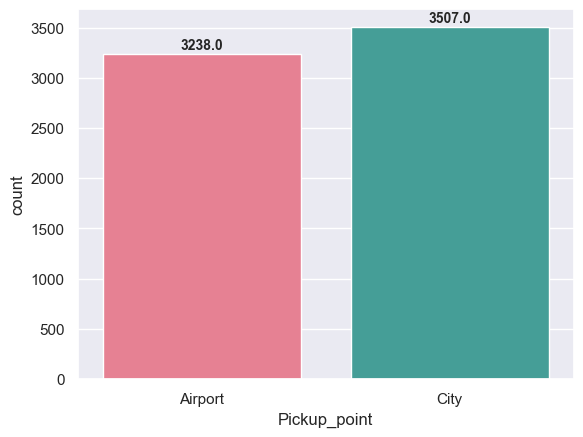

In [122]:
# Set visual style
sns.set(style="darkgrid")

# Create countplot with a color palette
ax = sns.countplot(x="Pickup_point", data=df, palette="husl")

# Add labels on top of bars
for p in ax.patches:
    value = p.get_height()
    X = p.get_x() + p.get_width() / 2
    Y = value + 50
    ax.text(X, Y, value, ha="center", fontsize=10, fontweight='bold')

/var/folders/w3/tdkzd_t102jfy31254zdm9cm0000gn/T/ipykernel_4394/148585614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Status", data=df, palette = "husl")


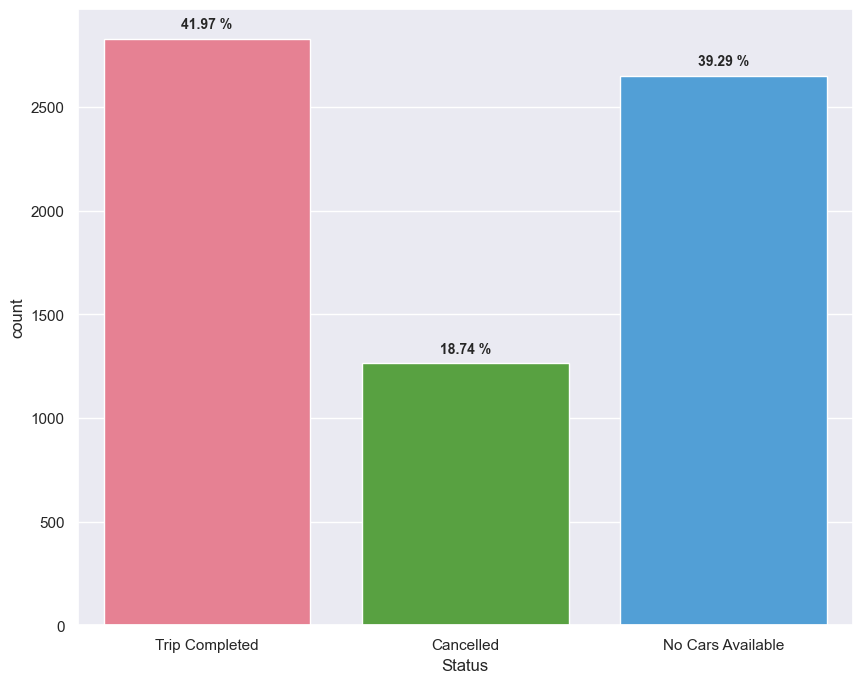

In [123]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="Status", data=df, palette = "husl")
# Total rows for percentage calculation
total = len(df)

# Add percentage labels on bars
for p in ax.patches:
    height = p.get_height()
    percentage = round((height / total) * 100, 2)
    x = p.get_x() + p.get_width() / 2
    y = height + 50
    ax.text(x, y, f'{percentage} %', ha="center", fontsize=10, fontweight='bold')

/var/folders/w3/tdkzd_t102jfy31254zdm9cm0000gn/T/ipykernel_4394/3204117512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x='request_DayOfWeek', data=df, palette="husl")


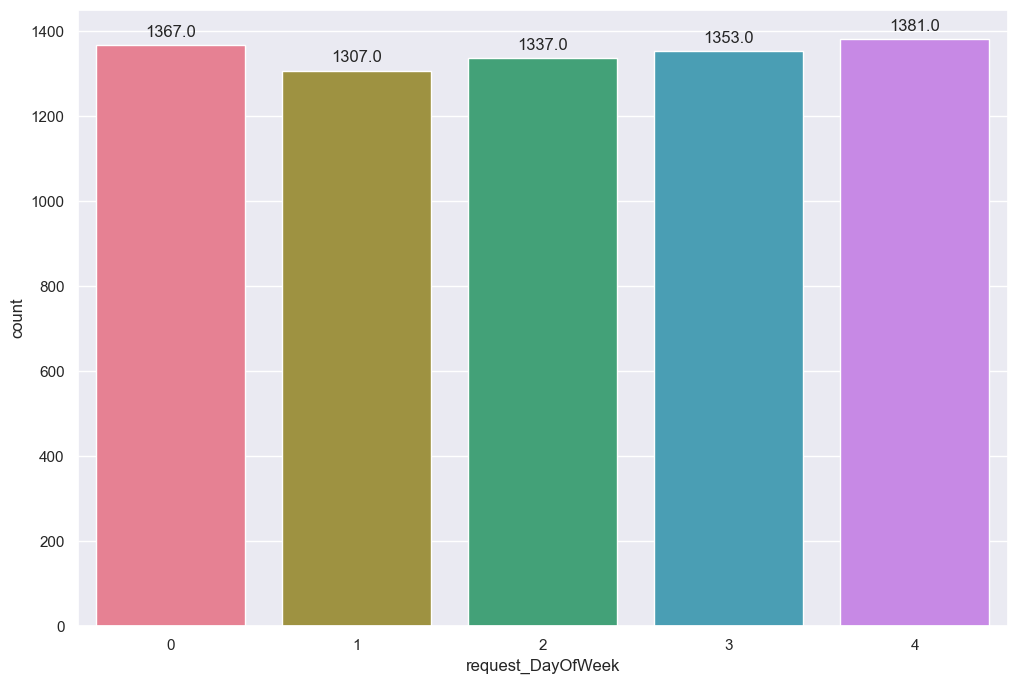

In [116]:
#looking to find the request count vs daysof week
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='request_DayOfWeek', data=df, palette="husl")
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+20
    ax.text(X, Y, value, ha="center")
plt.show()

/var/folders/w3/tdkzd_t102jfy31254zdm9cm0000gn/T/ipykernel_4394/3876748768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='request_hour', data=df, palette="husl")


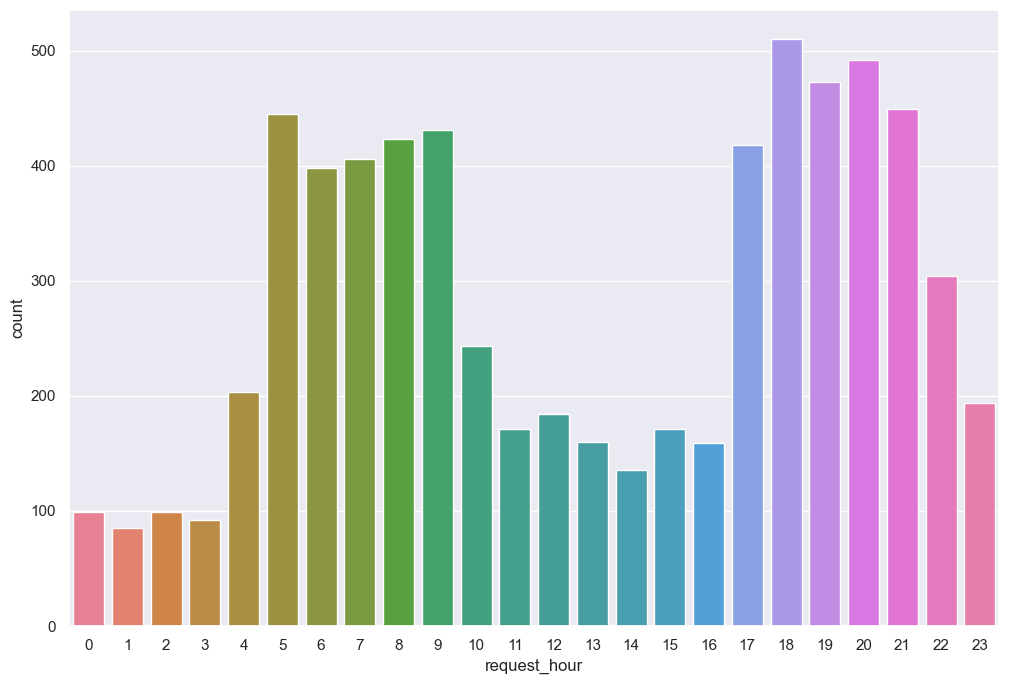

In [ ]:
#looking for insight in request hour
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='request_hour', data=df, palette = "husl")
plt.show()

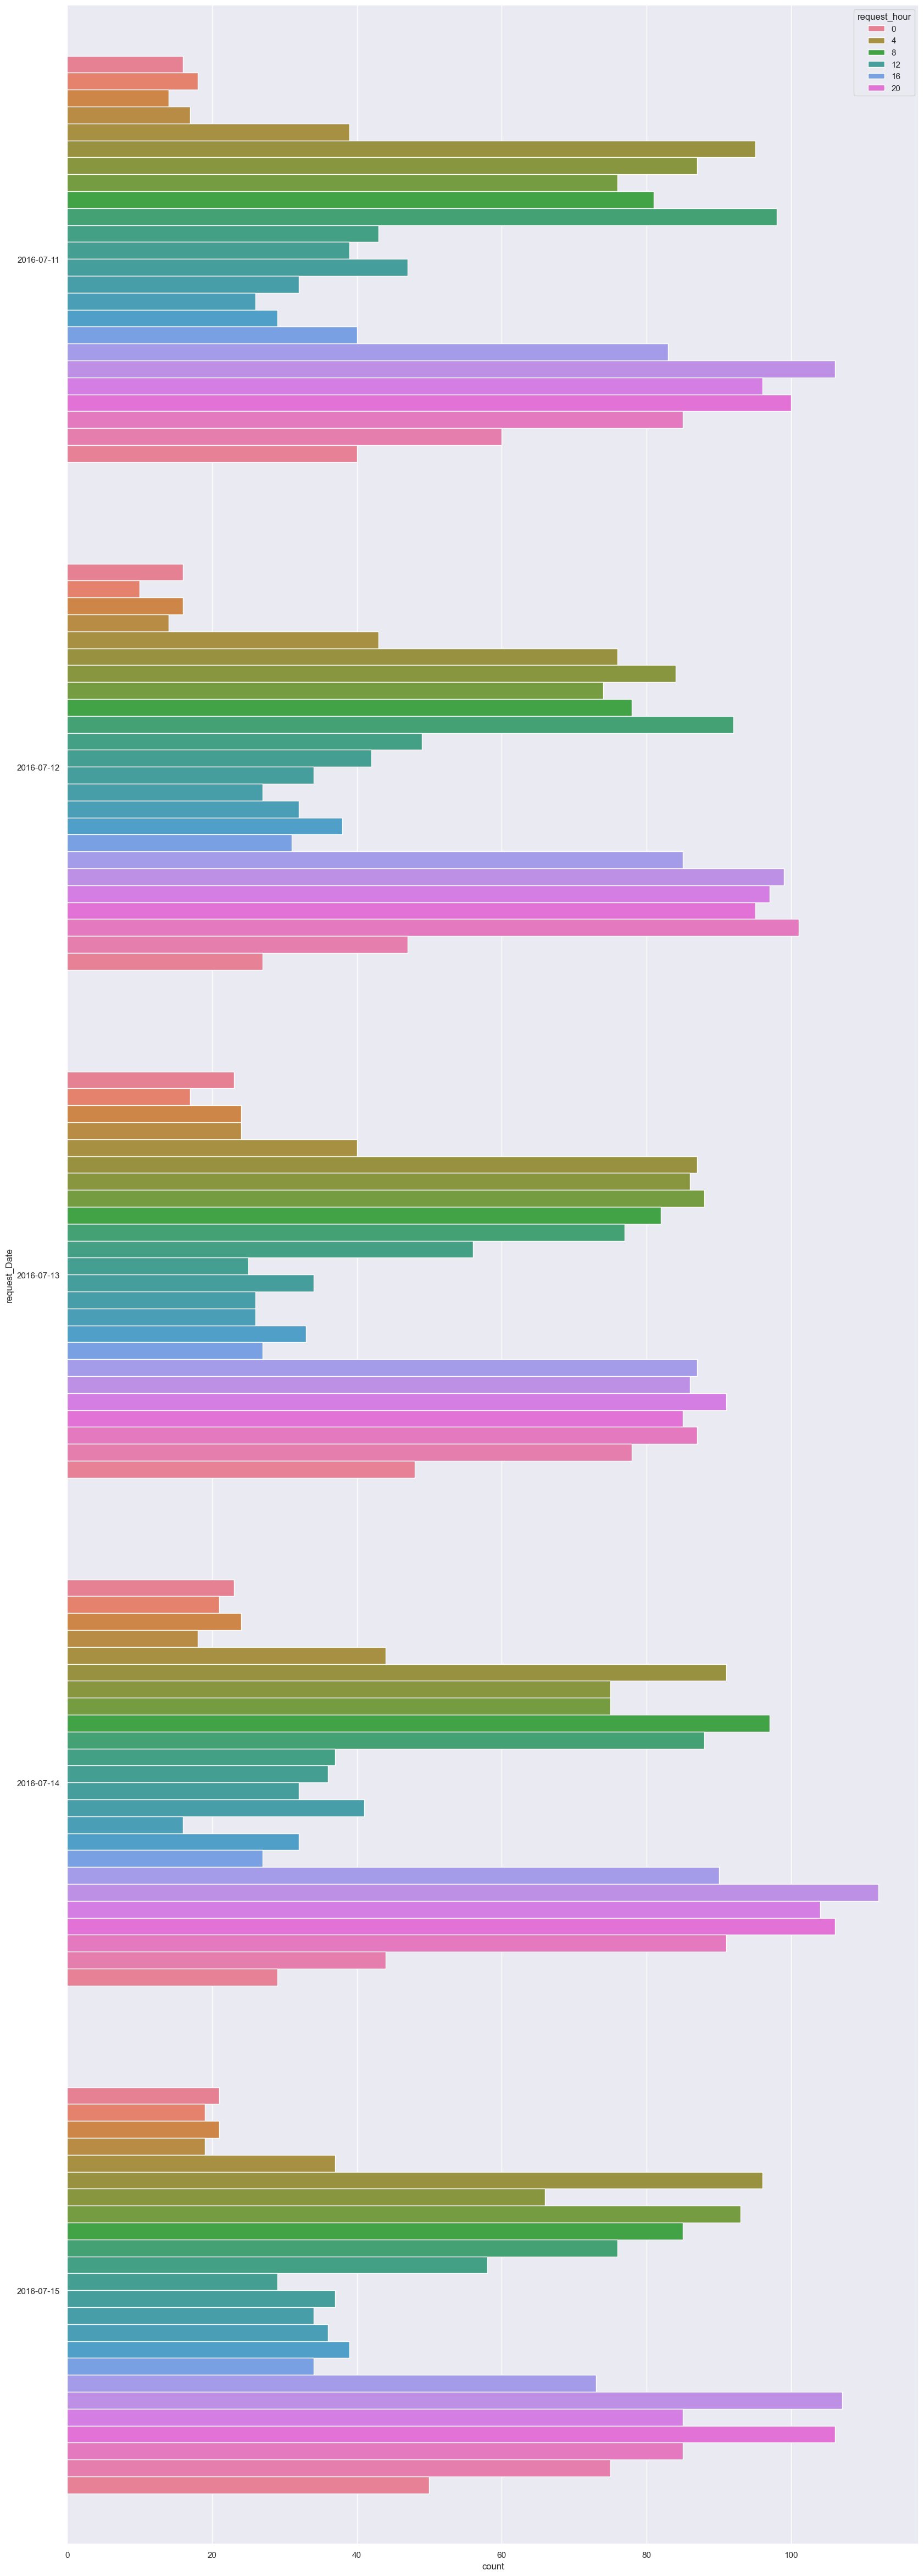

In [135]:
#checking if high request rates from 5am to 9am and 5pm to 10 pm is consistent throughout all days

plt.figure(num=None, figsize=(20, 60), facecolor='w', edgecolor='b')
sns.countplot(y='request_Date',hue="request_hour", data=df, palette = "husl")
plt.show()

/var/folders/w3/tdkzd_t102jfy31254zdm9cm0000gn/T/ipykernel_4394/3963497294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x='request_timeslot', data=df, palette = "husl")


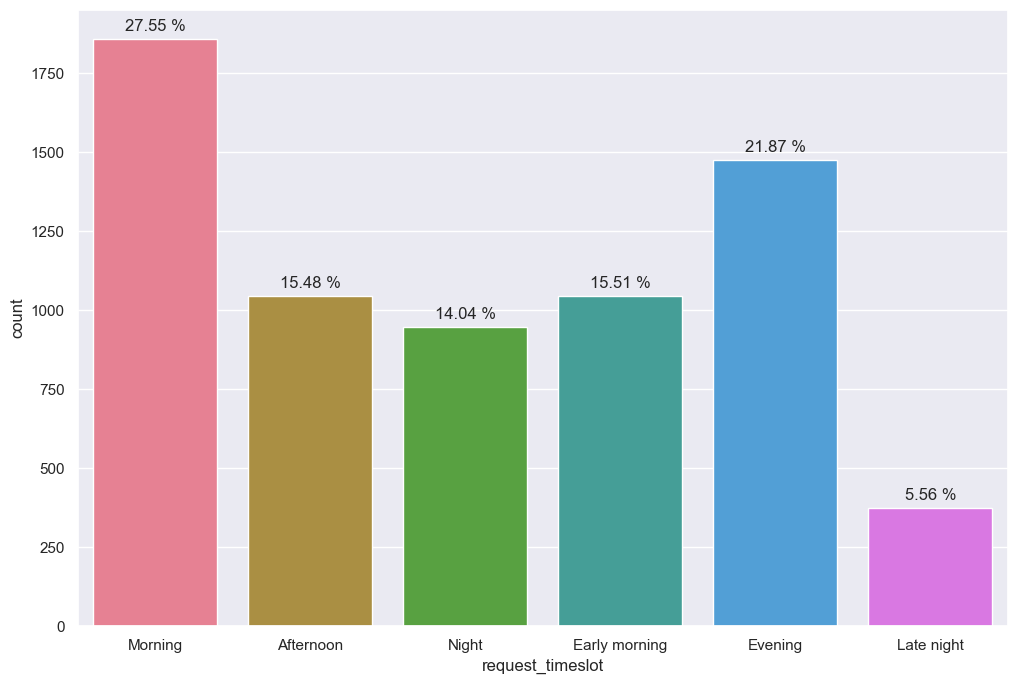

In [136]:
#looking for insight in request timeslot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='b')
ax =sns.countplot(x='request_timeslot', data=df, palette = "husl")
total = len(uber)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+25
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()

#### Analytical observations :
- Only 41.97% requests from city and airport request gets completed
- High request rates are from Morning and Evening Slot

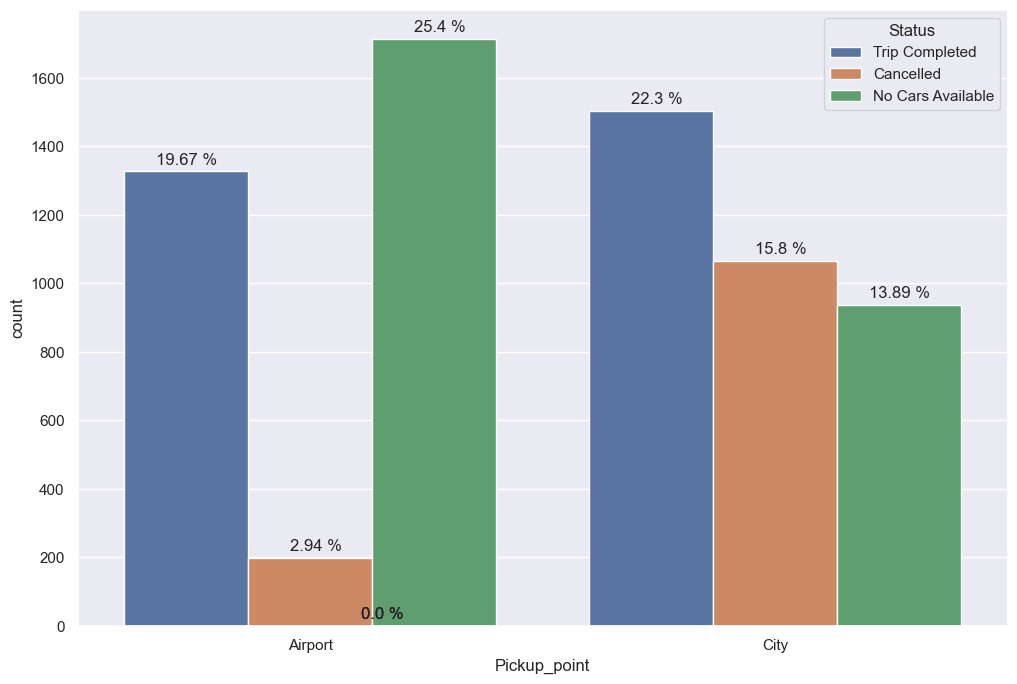

In [138]:
#segmenting pickup point over status
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Pickup_point', hue="Status", data=uber)
total = len(uber)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.2
    Y = p.get_height()+20
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

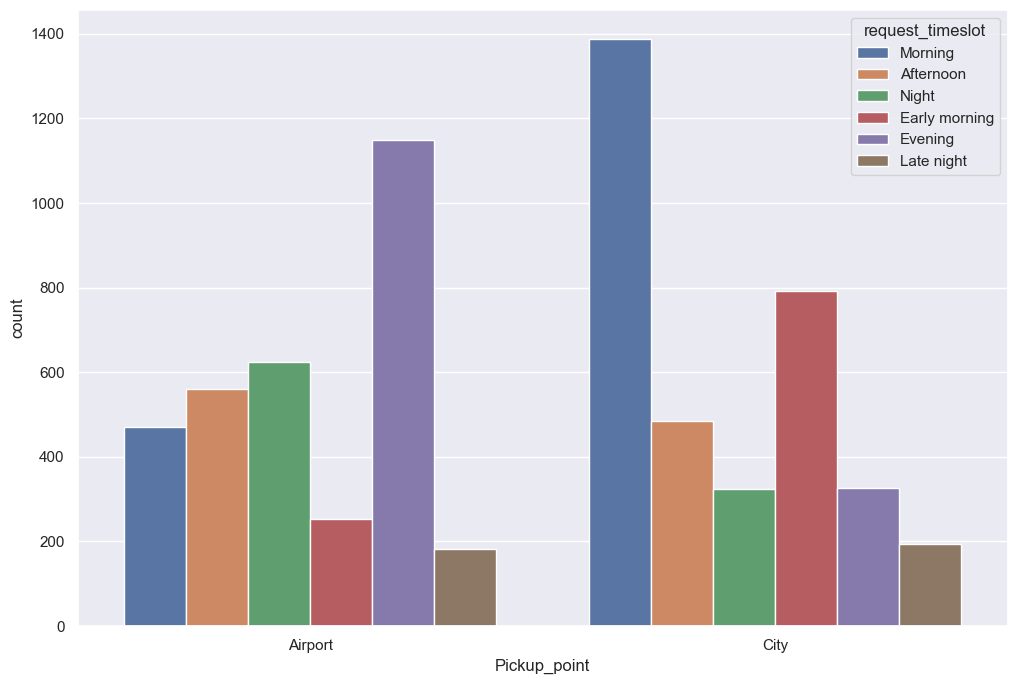

In [139]:
#segmenting pickup point over time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Pickup_point', hue="request_timeslot", data=uber)
plt.show()


/var/folders/w3/tdkzd_t102jfy31254zdm9cm0000gn/T/ipykernel_4394/3655577196.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 85)` for the same effect.

  sns.catplot(x='Pickup_point',col="Status", hue = 'request_timeslot',data=uber ,kind="count",


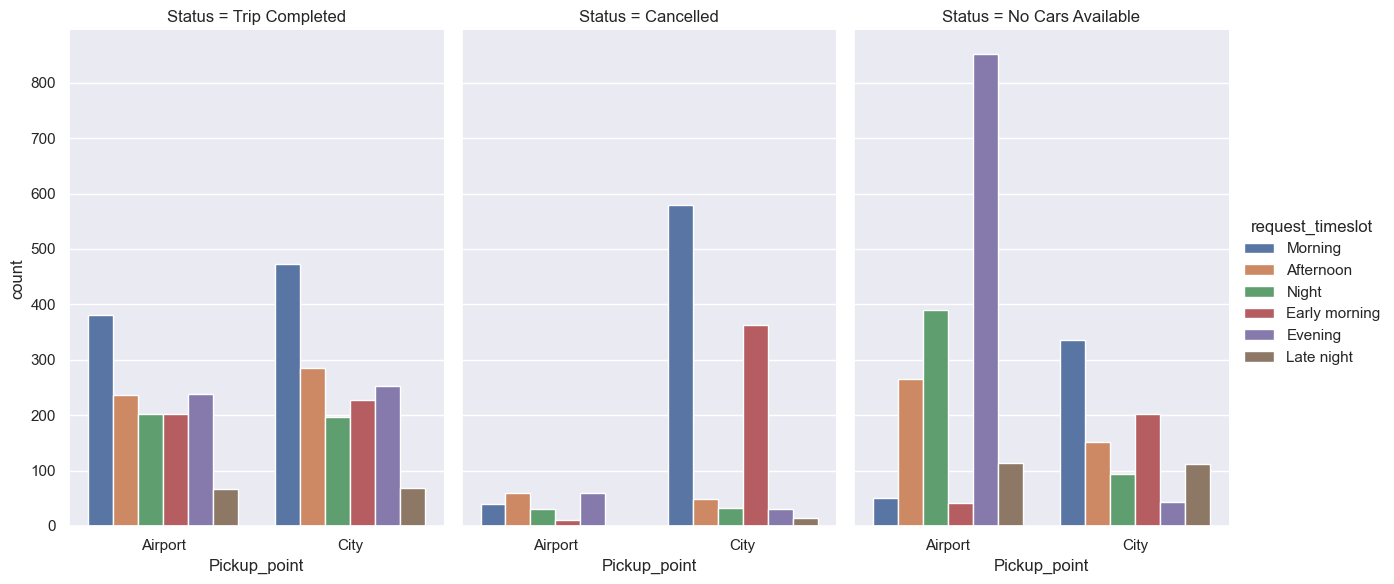

In [140]:
#segmenting the timeslot vs both Status and pickup point 
sns.catplot(x='Pickup_point',col="Status", hue = 'request_timeslot',data=uber ,kind="count",
            height=6,aspect= 0.7,ci=85,col_wrap=3,margin_titles=True)
plt.show()

### Analytical observations : 
the problematic status are cancelled and no cars available as it lead to potential loss of revenue.

- The airport pickup location typically has 'no car available'
- City pickup point has highest 'Cancelled' status
- 'Airport' - has the hightest request in the 'evening' aligning to our 'no car available' status
- 'City'- has the hightest request in the 'morning' aligning to our 'Cancelled' status

### Supply and demand gap calculation

In [150]:
df.loc[(df.Status == 'Trip Completed') | (df.Status == 'Cancelled')| (df.Status == 'No Cars Available'), 'demand'] = 'Demand'
#creating supply column
df.loc[(df.Status == 'Trip Completed'), 'supply'] = 'Supply'
#creating gap column
df.loc[(df.Status == 'Cancelled')| (df.Status == 'No Cars Available'), 'gap'] = 'Gap' 
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,request_timeslot,drop_Date,drop_Time,demand,supply,gap
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,0,11,Morning,2016-07-11,13:00:00,Demand,Supply,NaN
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,0,17,Afternoon,2016-07-11,18:47:00,Demand,Supply,NaN
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,1,9,Morning,2016-07-12,09:58:00,Demand,Supply,NaN
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,1,21,Night,2016-07-12,22:03:00,Demand,Supply,NaN
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2,8,Morning,2016-07-13,09:25:47,Demand,Supply,NaN


In [152]:
#calculating demand count
df['demand'].count()

np.int64(6745)

In [154]:
#calculating supply count
df['supply'].count()

np.int64(2831)

In [155]:
#calculating gap count
df['gap'].count()

np.int64(3914)

In [160]:
df_SupplyandDemand = pd.DataFrame([df.demand,df.supply,df.gap]).transpose()
df_SupplyandDemand.head()

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN


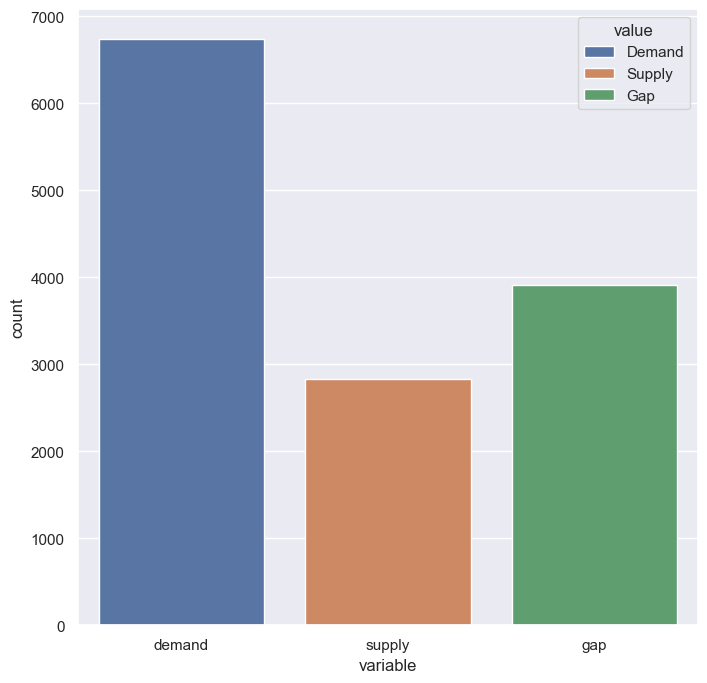

In [165]:
# plotting demand, supply and gap count
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k')
sns.countplot(x="variable",hue="value", data=pd.melt(df_SupplyandDemand))
plt.show()


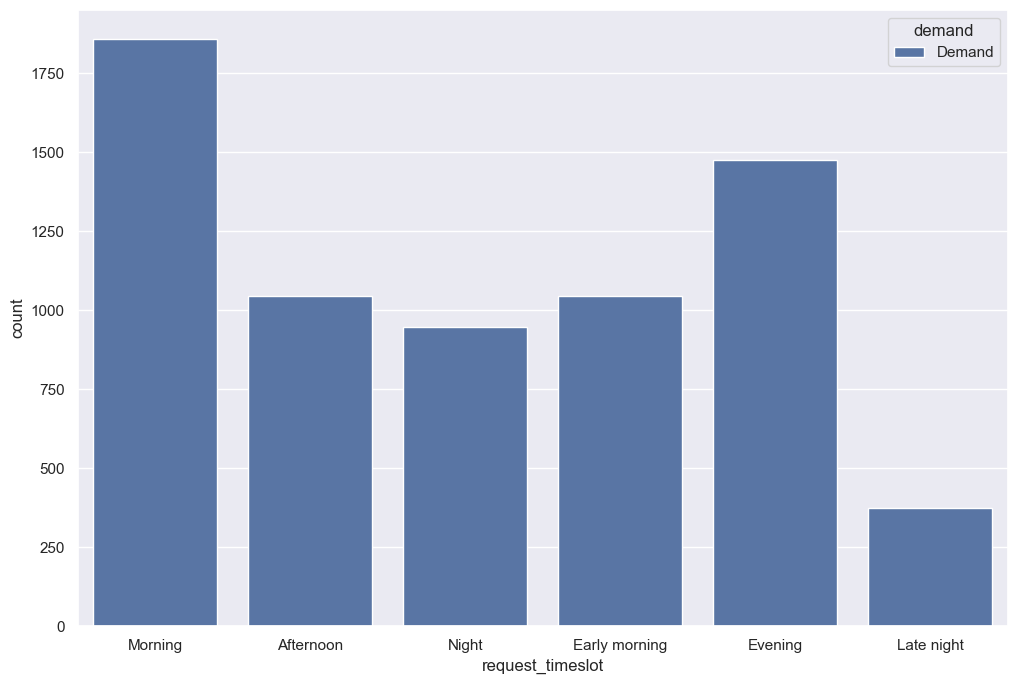

In [176]:
#segmenting demand across the request time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(hue='demand',x="request_timeslot", data=df)
plt.show()

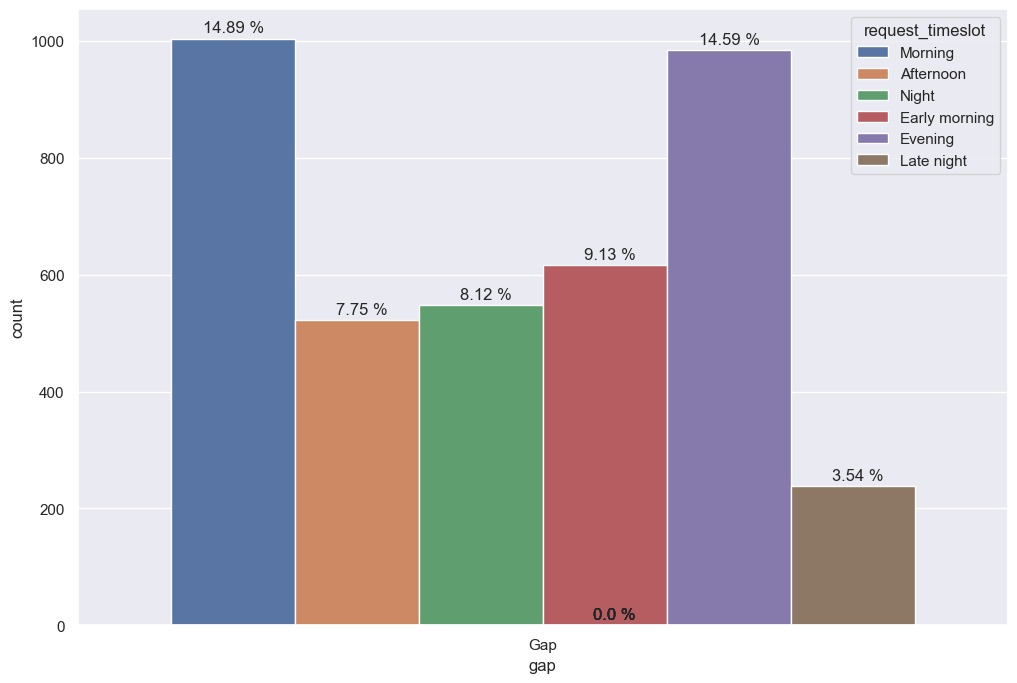

In [179]:
#segmenting gap across the request time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='gap',hue="request_timeslot", data=df)
total = len(df['gap'])
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.1
    Y = p.get_height()+10
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

##### In the above graph - the percentage is taken only across the total gap percentage which is 58.02%

##### a. From the total gap percentage(58.02%) -around 15% gap exist during morning and evenings

/var/folders/w3/tdkzd_t102jfy31254zdm9cm0000gn/T/ipykernel_4394/3572471236.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 85)` for the same effect.

  sns.catplot(x='request_timeslot',col="gap", hue = 'Status',data=df ,kind="count", height=7,aspect= 0.9,ci=85)


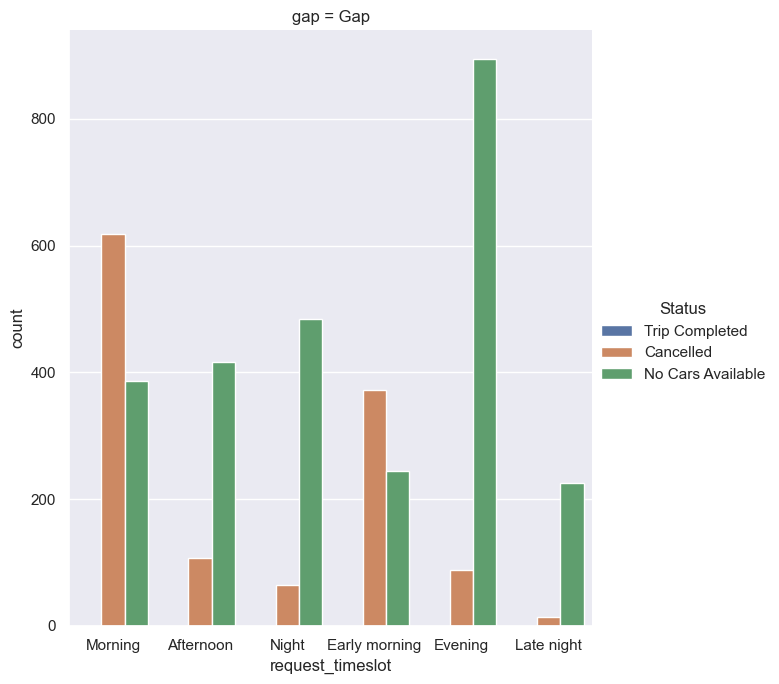

In [181]:
#segmenting gap across the status and request timeslot
sns.catplot(x='request_timeslot',col="gap", hue = 'Status',data=df ,kind="count", height=7,aspect= 0.9,ci=85)
plt.show()

/var/folders/w3/tdkzd_t102jfy31254zdm9cm0000gn/T/ipykernel_4394/2968413265.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 85)` for the same effect.

  sns.catplot(x='gap',col="request_timeslot", hue = 'Pickup_point',data=df ,kind="count", height=5,aspect= 0.5,


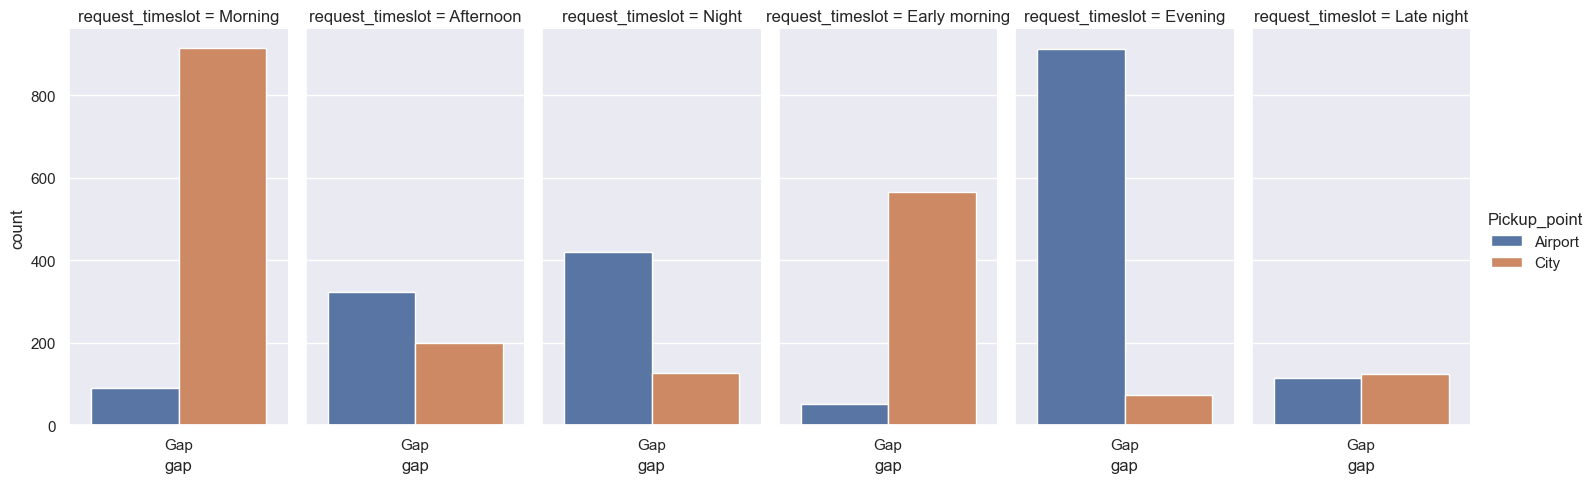

In [182]:
#segmenting gap across the pickup point and request timeslot
sns.catplot(x='gap',col="request_timeslot", hue = 'Pickup_point',data=df ,kind="count", height=5,aspect= 0.5,
            ci=85)
plt.show()

/var/folders/w3/tdkzd_t102jfy31254zdm9cm0000gn/T/ipykernel_4394/3791781798.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 50)` for the same effect.

  sns.catplot(x='request_hour',col="Pickup_point", hue = 'gap',data=df ,kind="count", height=10,aspect= 1,


<Figure size 1000x600 with 0 Axes>

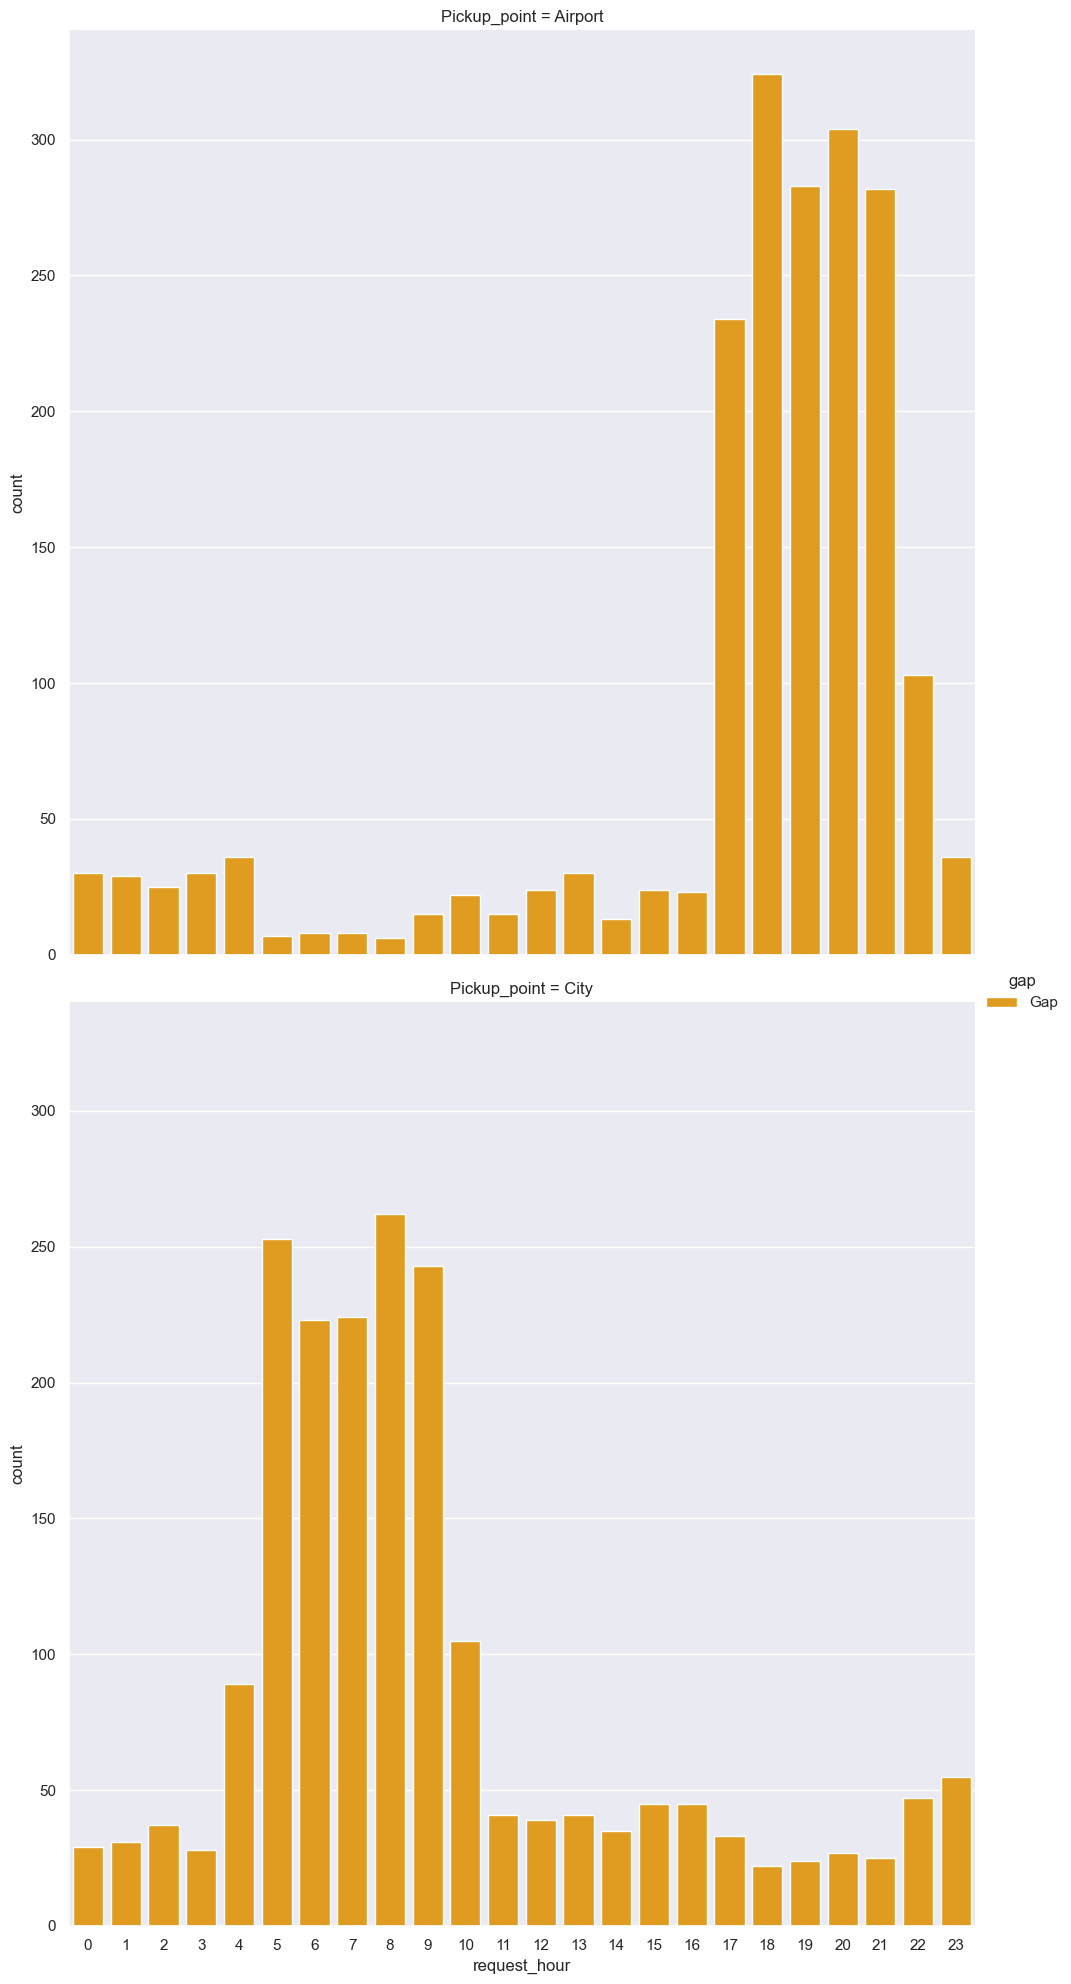

In [191]:
#segmenting the gap across the request hour and pickup point
plt.figure(num=None, figsize=(10, 6), facecolor='w', edgecolor='k')
sns.catplot(x='request_hour',col="Pickup_point", hue = 'gap',data=df ,kind="count", height=10,aspect= 1,
            ci=50,col_wrap=1,palette=sns.color_palette(['orange']))
plt.show()

### Analytical observations :

The problematic status are 'cancelled' and 'no cars available' as it leads to potential loss of revenue. We observed the highest value of:

* Status: "No car available"

  Where is it happening: Airport - i.e airport to city

  When is it happening: Evening 

* Status: "Cancelled"

  Where is it happening: City - i.e city to airport

  When is it happening: Morning

The above points are in sync with highest request rates coming from morning and evening slot.

To make our analayse our observation so far, we further looked into the 'gap'. This again is in sync with above observations. The 'gap' which exists are the hightest:

* Status: "No car available"

  Where is it happening: Airport - i.e airport to city

  When is it happening: Evening 

* Status: "Cancelled"

  Where is it happening: City - i.e city to airport
  
  When is it happening: Morning.

And vice versa is not true:

   1. Morning hours :There is no high demand for cabs from airport to city 
   2. Evening hours: There is no high demand for cabs from city to airport


This tells us that there are more outbound flights in the morning and inbound flights in the evening.

### The reason for the issue:

- In the morning hours: Though there is high demand for cabs from city to airport, the vice versa is not true.

Hence the driver tends to 'cancel' the request as getting a return trip from airport to city would be tough.

- In the evening hours: Though there is high demand for cabs from airport to city, the vice versa is not true.

Hence 'no cars available' in the airport is the hightest in the evening.

#### Possible suggestions to fill the supply demand gap:

- Provide incentives for airport trips during peak time

- Assigning few extra cabs specially to the airport trips

- Fixing a base price for drivers idle time in the airport or to come back to the city without any passenger
- Impose penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day

- Promote continuous trip to airport with incentives

- Promote advance booking to airports and at the same time keeping drivers updated will the flight schedule with help them plan their work and they can accept the request as per their work plan